### K-Nearest Neighbor (KNN)

Used to classify new data points based on "distance" to known data

Find the K nearest neighbors, based on your distance metrics

Let them all vote on the classification

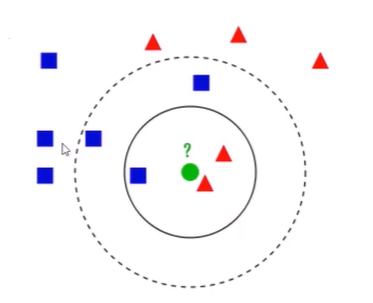

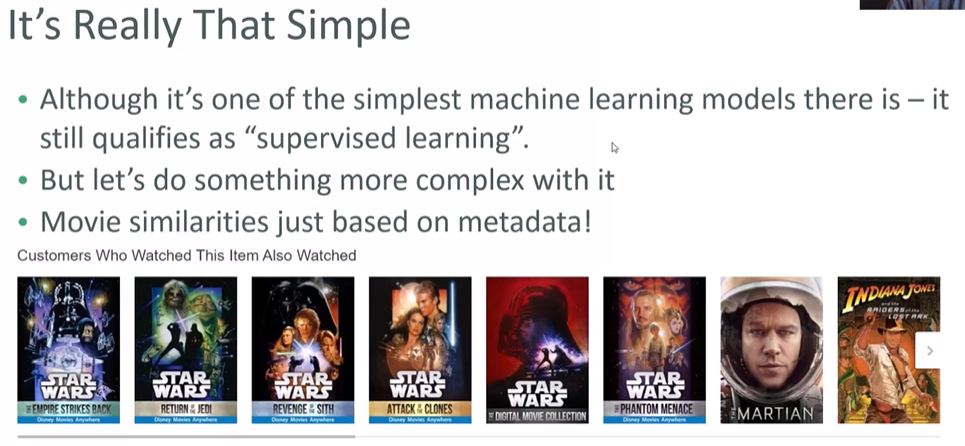

In [1]:
import pandas as pd
import numpy as np
import os

r_cols = ["user_id", "movie_id", "rating"]
df = pd.read_csv("data/ml-100k/u.data", sep="\t", names=r_cols, usecols=range(3))
df.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [2]:
movieProperties = df.groupby("movie_id").agg({"rating":[np.size, np.mean]})
movieProperties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [3]:
movieNumRatings = pd.DataFrame(movieProperties["rating"]["size"])
movieNormalizedRatings = movieNumRatings.apply(lambda x: ( x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedRatings.head()

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


In [17]:
movieDict = {}
with open("data/ml-100k/u.item") as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name,
                              np.array(list(genres)),
                              movieNormalizedRatings.loc[movieID].get("size"),
                              movieProperties.loc[movieID].rating.get("mean"))

In [18]:
movieDict[1]

('Toy Story (1995)',
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0.7735849056603774,
 3.8783185840707963)

In [19]:
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [20]:
ComputeDistance(movieDict[2], movieDict[4])

0.8004574042309892

In [29]:
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if movie != movieID:
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

In [31]:
K = 10
avgRating = 0
neighbors = getNeighbors(1, K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Liar Liar (1997) 3.156701030927835
Aladdin (1992) 3.8127853881278537
Willy Wonka and the Chocolate Factory (1971) 3.6319018404907975
Monty Python and the Holy Grail (1974) 4.0664556962025316
Full Monty, The (1997) 3.926984126984127
George of the Jungle (1997) 2.685185185185185
Beavis and Butt-head Do America (1996) 2.7884615384615383
Birdcage, The (1996) 3.4436860068259385
Home Alone (1990) 3.0875912408759123
Aladdin and the King of Thieves (1996) 2.8461538461538463


In [32]:
avgRating /= float(K)
avgRating

3.3445905900235564

In [33]:
movieDict[1]

('Toy Story (1995)',
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0.7735849056603774,
 3.8783185840707963)

### Principal Component Analysis

PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions.

In [36]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
numSamples, numFeatures

(150, 4)

In [37]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [38]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [39]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [40]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [41]:
sum(pca.explained_variance_ratio_)

0.9776852063187949

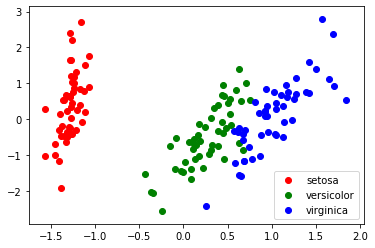

In [43]:
colors = cycle("rgb")
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
    c=c, label=label)
pl.legend()
pl.show()